<a href="https://colab.research.google.com/github/franklaercio/titanic_machine_learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 

titanic_url = "https://raw.githubusercontent.com/franklaercio/titanic_machine_learning/master/train.csv"
titanic_data = pd.read_csv(titanic_url)
titanic_data = titanic_data.dropna(axis=0)

In [2]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [4]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


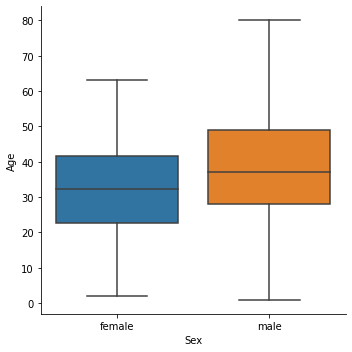

In [6]:
sns.catplot(x="Sex", y="Age", kind="box", data=titanic_data)

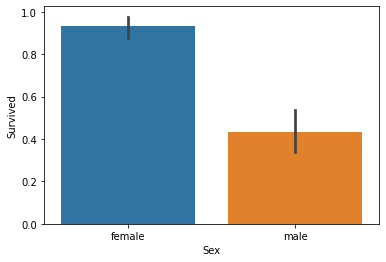

In [7]:
sns.barplot(x='Sex', y='Survived', data=titanic_data,)

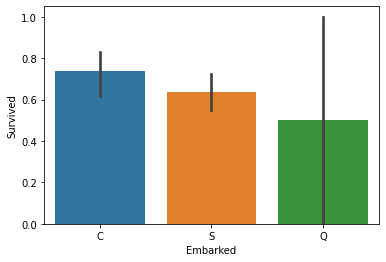

In [8]:
sns.barplot(x='Embarked', y='Survived', data=titanic_data,)

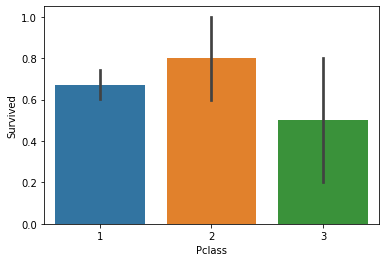

In [9]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data,)

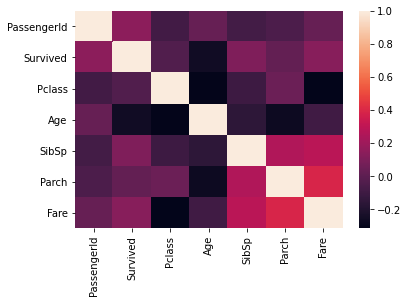

In [10]:
sns.heatmap(titanic_data.corr())

In [11]:
y = titanic_data.Survived

titanic_features = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
X = titanic_data[titanic_features]

In [14]:
X.describe()

,Age,Pclass,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,35.674426,1.191257,0.464481,0.475410,78.682469
std,15.643866,0.515187,0.644159,0.754617,76.347843
min,0.920000,1.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,0.000000,0.000000,29.700000
50%,36.000000,1.000000,0.000000,0.000000,57.000000
75%,47.500000,1.000000,1.000000,1.000000,90.000000
max,80.000000,3.000000,3.000000,4.000000,512.329200


In [15]:
X.head()

,Age,Pclass,SibSp,Parch,Fare
1,38.0,1,1,0,71.2833
3,35.0,1,1,0,53.1000
6,54.0,1,0,0,51.8625
10,4.0,3,1,1,16.7000
11,58.0,1,0,0,26.5500
